In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
data_files_paths = '../02 Data/Original Data/Airbnb Amsterdam/'

In [4]:
# Import files into pandas DataFrames
calendar = pd.read_csv(data_files_paths + 'calendar.csv', parse_dates=['date'], index_col=['listing_id'])
listings = pd.read_csv(data_files_paths + 'listings.csv', index_col= "id")
reviews_details = pd.read_csv(data_files_paths + 'reviews_details.csv', parse_dates=['date'], index_col=['id'])
reviews = pd.read_csv(data_files_paths + 'reviews.csv', parse_dates=['date'], index_col=['listing_id'])
listings_details = pd.read_csv(data_files_paths + 'listings_details.csv', index_col= "id", low_memory=False)
neighbourhoods = pd.read_csv(data_files_paths + 'neighbourhoods.csv')

In [ ]:
# Select relevant columns from listings and listings_details
listings_columns = ['id', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'number_of_reviews', 'availability_365']
listings_details_columns = ['id', 'host_response_time', 'host_is_superhost', 'property_type', 'accommodates', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

# Extract the relevant columns
listings_filtered = listings[listings_columns]
listings_details_filtered = listings_details[listings_details_columns]

# Merge the DataFrames
merged_listings = pd.merge(listings_filtered, listings_details_filtered, on='id')

## Q3 Cleaning data 

In [6]:
merged_listings.isnull().sum()

name                                 38
host_id                               0
host_name                             4
neighbourhood_group               20030
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        2406
reviews_per_month                  2406
calculated_host_listings_count        0
availability_365                      0
property_type                         0
accommodates                          0
first_review                       2406
review_scores_value                2659
review_scores_cleanliness          2647
review_scores_location             2660
review_scores_accuracy             2649
review_scores_communication        2652
review_scores_checkin              2661
review_scores_rating               2639


In [7]:
# Removing column with a lot of Nulls
merged_listings = merged_listings.drop(columns=['neighbourhood_group', 'monthly_price', 'weekly_price'])

In [8]:
merged_listings.isnull().sum()

name                                38
host_id                              0
host_name                            4
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2406
reviews_per_month                 2406
calculated_host_listings_count       0
availability_365                     0
property_type                        0
accommodates                         0
first_review                      2406
review_scores_value               2659
review_scores_cleanliness         2647
review_scores_location            2660
review_scores_accuracy            2649
review_scores_communication       2652
review_scores_checkin             2661
review_scores_rating              2639
maximum_nights                       0
listing_url              

In [9]:
# Calculate the mean values for the relevant columns
mean_values = merged_listings[['review_scores_value', 'review_scores_cleanliness', 'review_scores_location', 'review_scores_accuracy', 'review_scores_communication', 'review_scores_checkin', 'review_scores_rating']].mean()

# Replace null values with the mean values
merged_listings.fillna(mean_values, inplace=True)

# Check if null values have been replaced
print(merged_listings.isnull().sum())

name                                38
host_id                              0
host_name                            4
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2406
reviews_per_month                 2406
calculated_host_listings_count       0
availability_365                     0
property_type                        0
accommodates                         0
first_review                      2406
review_scores_value                  0
review_scores_cleanliness            0
review_scores_location               0
review_scores_accuracy               0
review_scores_communication          0
review_scores_checkin                0
review_scores_rating                 0
maximum_nights                       0
listing_url              

In [12]:
# Droping rows with nulls in host_is_superhost 
merged_listings_clean = merged_listings.dropna(subset=['host_is_superhost'])
# Check if null values have been droped
print(merged_listings_clean.isnull().sum())

name                                38
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2405
reviews_per_month                 2405
calculated_host_listings_count       0
availability_365                     0
property_type                        0
accommodates                         0
first_review                      2405
review_scores_value                  0
review_scores_cleanliness            0
review_scores_location               0
review_scores_accuracy               0
review_scores_communication          0
review_scores_checkin                0
review_scores_rating                 0
maximum_nights                       0
listing_url              

There is no need in cleaning other nulls.

## Q4 Exploring data visually, looking for variables whose relationship to test.

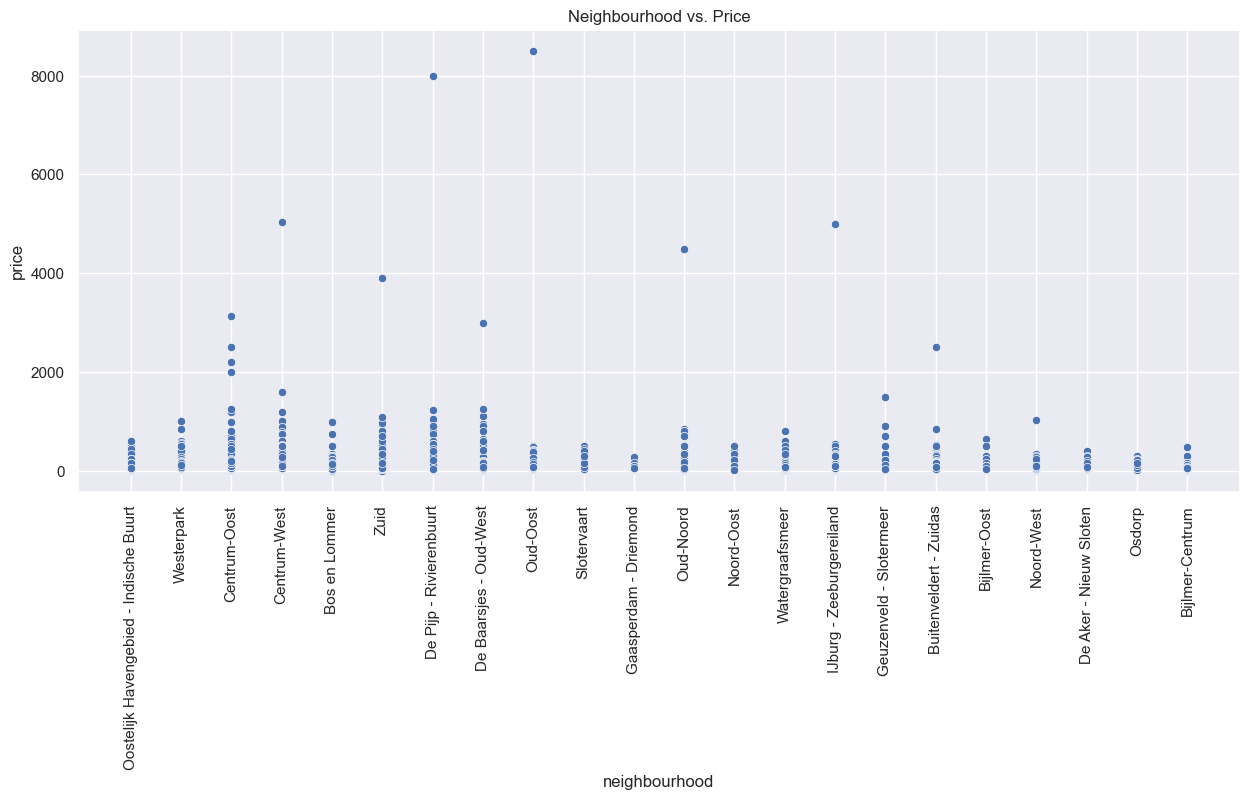

In [13]:
# 1. neighbourhood vs. price
plt.figure(figsize=(15, 6))
sns.scatterplot(data=merged_listings_clean, x='neighbourhood', y='price')
plt.xticks(rotation=90)
plt.title('Neighbourhood vs. Price')
plt.show()

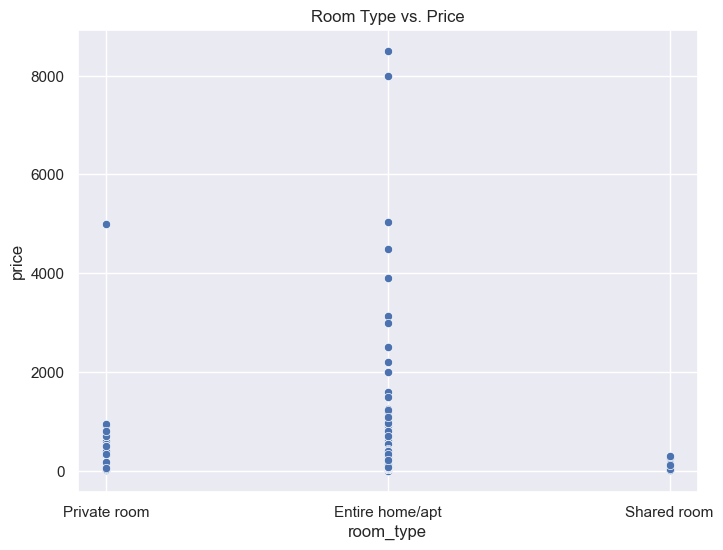

In [14]:
# 2. room_type vs. price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_listings_clean, x='room_type', y='price')
plt.title('Room Type vs. Price')
plt.show()

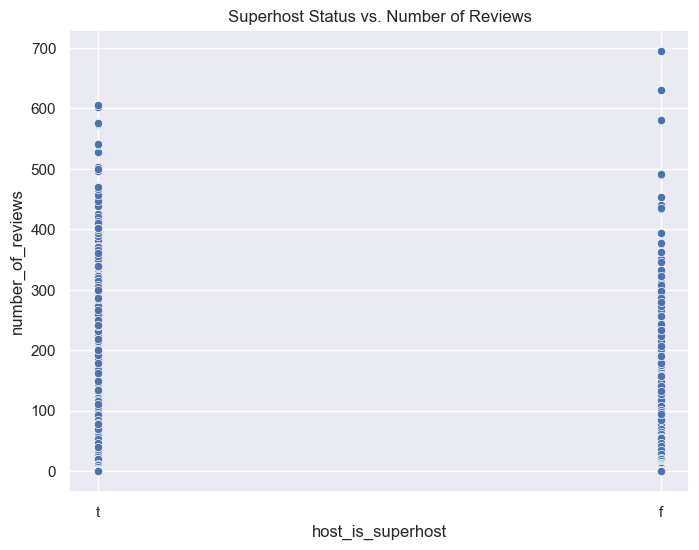

In [15]:
# 3. host_is_superhost vs. number_of_reviews
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_listings_clean, x='host_is_superhost', y='number_of_reviews')
plt.title('Superhost Status vs. Number of Reviews')
plt.show()

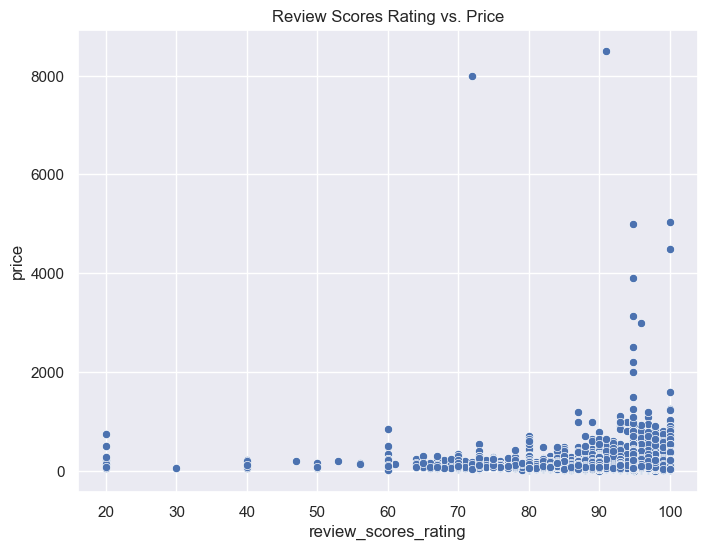

In [16]:
# 4. review_scores_rating vs. price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_listings_clean, x='review_scores_rating', y='price')
plt.title('Review Scores Rating vs. Price')
plt.show()

## Q5 Stating potential hypothesis
a. The location of a listing (neighborhood) has a significant impact on its price and demand.

b. The type of accommodation (room type, property type) influences pricing and customer preferences.

c. Host-related factors (e.g., response time, experience, and superhost status) may affect listing performance.

d. Analyzing reviews can provide insights into factors that influence customer satisfaction and contribute to a listing's success.

## Q6 Reshape the variables into NumPy arrays.

In [20]:
# Convert neighbourhood to numerical values
le = LabelEncoder()
merged_listings_clean['neighbourhood_encoded'] = le.fit_transform(merged_listings_clean['neighbourhood'])

X = merged_listings_clean['neighbourhood_encoded'].values.reshape(-1, 1)
y = merged_listings_clean['price'].values.reshape(-1, 1)

/var/folders/1t/82zy_nkj13dg65kz31p835s00000gn/T/ipykernel_50885/2479974129.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_listings_clean['neighbourhood_encoded'] = le.fit_transform(merged_listings_clean['neighbourhood'])


## Q7 Spliting the data into two sets

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Q8 Runing a linear regression on the data

In [22]:
# Creating and fitting model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting results with model
y_pred = model.predict(X_test)

## Q9 Creating a plot that shows the regression line on the test set.

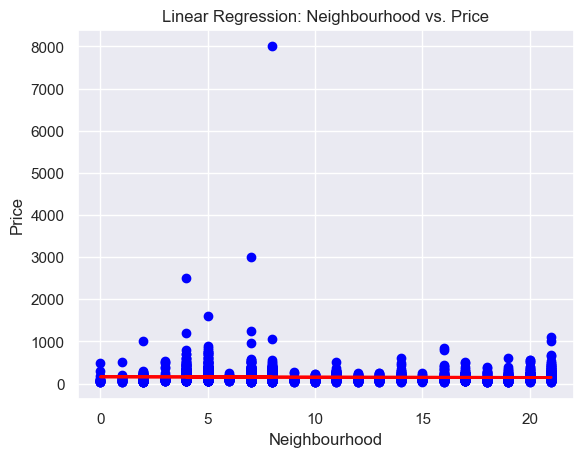

In [23]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.title('Linear Regression: Neighbourhood vs. Price')
plt.show()

## Q10 Write your own interpretation of how well the line appears to fit the data in a markdown cell.

Outliers of values interfere with visual analysis. 

## Q11 Checking the model performance statistics—MSE and R2 score

In [24]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 29062.76339989971
R2 Score: 0.0014578876630125803


## Q12 Compare the predicted y values with the actual y values in a dataframe

In [27]:
comparison = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(comparison.head(20))

    Actual   Predicted
0      189  152.861227
1      150  154.708244
2       48  149.782864
3      124  152.861227
4      187  154.708244
5      120  153.476899
6      350  153.476899
7      145  156.555262
8      120  144.857484
9      225  145.473156
10     110  154.708244
11      99  156.555262
12     120  153.476899
13     100  156.555262
14      95  147.320174
15     180  155.323917
16     149  144.857484
17      80  149.167192
18     125  149.167192
19      95  153.476899


## Q13 Include your thoughts on how well the model performed on the test set in a markdown cell. Include any reflections you have on the impact of possible data bias.

Based on the output of the Mean Squared Error (MSE) and R2 Score, it seems that the linear regression model does not perform well in predicting the target variable (price) based on the chosen independent variables. An R2 Score of 0.0015 is extremely low, indicating that the model only explains a very small proportion (0.15%) of the variance in the target variable.

When looking at the comparison of actual and predicted prices, it's evident that the model's predictions are quite far from the actual prices. The differences between actual and predicted values vary greatly, and the model does not seem to capture the underlying relationship between the independent variables and the target variable.

There are several possible reasons for the poor performance of the model:

Feature selection: The chosen independent variables might not be the most relevant or significant predictors of the target variable (price). It's essential to perform feature selection and choose the most important variables that have a strong correlation with the target variable.

Data bias: The presence of outliers, multicollinearity, or other biases in the data can negatively impact the performance of the model. It's crucial to preprocess the data, remove outliers, and address any other data quality issues before fitting the model.

Model selection: A linear regression model might not be the best choice for this problem. The relationship between the independent variables and the target variable could be non-linear or more complex. In such cases, using a different model, such as a decision tree, random forest, or gradient boosting, might yield better results.

In conclusion, the current linear regression model does not fit the data well and provides poor predictions. It's important to revisit the feature selection, data preprocessing, and model selection steps to improve the model's performance. Additionally, it's crucial to be aware of possible data biases and address them to ensure a more accurate and reliable model.